In [16]:
import sys
print(sys.executable)


d:\Data_Science_Project\customer-churn-prediction\venv\Scripts\python.exe


In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

import joblib
import warnings
warnings.filterwarnings('ignore')


In [18]:
df = pd.read_csv('../data/churn_data.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df.shape

(7043, 21)

In [20]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [22]:
df.isnull().sum()



customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [24]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [25]:
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [26]:
cat_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [27]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


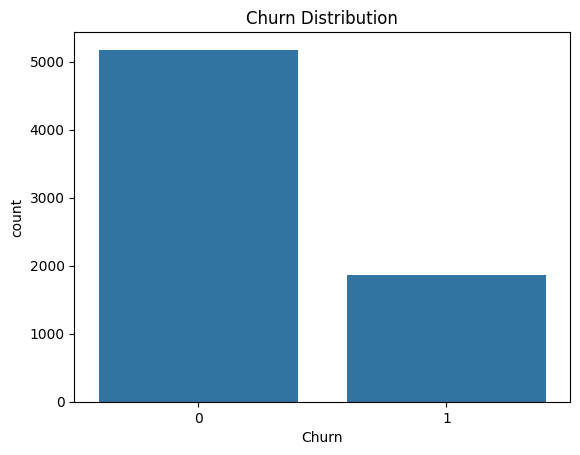

In [28]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


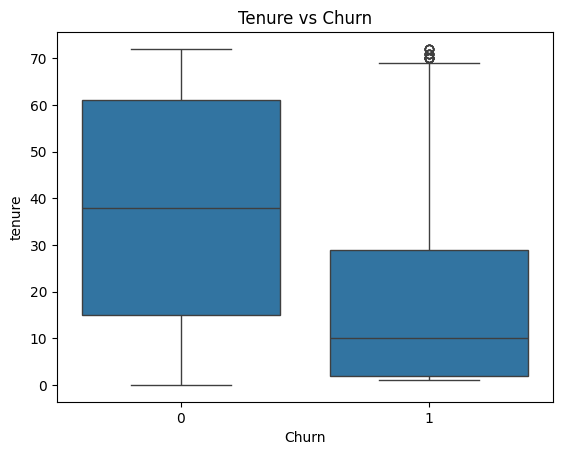

In [29]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()


In [30]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]


In [31]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]


In [32]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Logistic Regression Accuracy: 0.7934705464868701
Decision Tree Accuracy: 0.7842441447835344


In [33]:
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print("Decision Tree ROC-AUC:", roc_auc_score(y_test, y_prob_dt))


Logistic Regression ROC-AUC: 0.8405900436590974
Decision Tree ROC-AUC: 0.8207987806453279


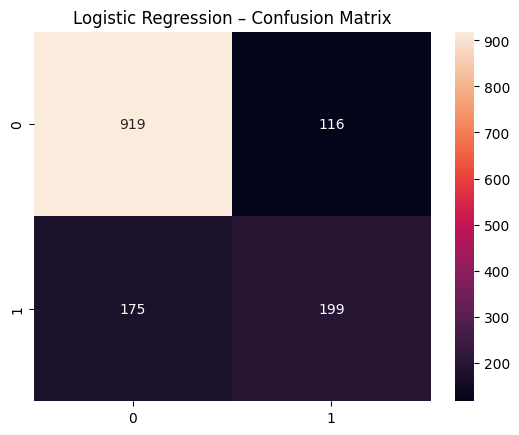

In [34]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')
plt.title('Logistic Regression – Confusion Matrix')
plt.show()


In [35]:
joblib.dump(lr, '../models/churn_model.pkl')


['../models/churn_model.pkl']

In [79]:
df_full = pd.read_csv('../data/churn_data.csv')


In [80]:

customer_id = "0617_VPNP"
df_new = pd.read_csv('../data/churn_data.csv')# 1. Load CSV
row = df_new[df_new['customerID'] == customer_id].copy()# 2. Select customer
if row.empty:
    print("❌ Customer ID not found")

else:
    row.drop(['customerID', 'Churn'], axis=1, inplace=True)# 3. Drop non-features
    X_new = X.iloc[[0]].copy()# 4. Create feature row using training structure
    X_new[:] = 0

    for col in X_new.columns:# 5. Fill raw values
        if col in row.columns:
            X_new[col] = row[col].values[0]

    for col in X_new.select_dtypes(include='object').columns:# 6. Encode categorical columns using TRAINING mappings
        mapping = {v: i for i, v in enumerate(df[col].astype(str).unique())}
        X_new[col] = X_new[col].astype(str).map(mapping)

        X_new[col].fillna(df[col].mode()[0], inplace=True)# CRITICAL FIX: remove NaN after mapping

    # 7. Predict
    prob = lr.predict_proba(X_new)[0][1]
    label = lr.predict(X_new)[0]

    # 8. Output
    if label == 1:
        print(f"⚠️ Customer {customer_id} is likely to CHURN (probability = {prob:.2f})")
    else:
        print(f"✅ Customer {customer_id} is likely to STAY (probability = {prob:.2f})")


✅ Customer 0617_VPNP is likely to STAY (probability = 0.41)


📌 Problem Statement

Predict whether a customer is likely to churn based on historical usage, service, and billing data.

🛠️ Approach

Data cleaning & preprocessing

Exploratory Data Analysis (EDA)

Logistic Regression & Decision Tree models

Model evaluation using Accuracy & ROC-AUC

🎯 Outcome

The model successfully predicts churn probability for new customers, enabling proactive retention strategies.